**Dataset**: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

**Predictive** **features**:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

**Dependent** **variables**:

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);

'stabf': a categorical (binary) label ('stable' or 'unstable').

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'

data = pd.read_csv(url)

data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
#shape of data
data.shape

(10000, 14)

In [4]:
#general overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
#checking for missing values
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
#check duplicated data
data.duplicated().any()

False

In [7]:
#data summary statistics
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [8]:
#checking distribution of our main dependent variable
data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [9]:
#dropping stab column according to problem requirements 
data = data.drop('stab', axis = 1)
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [10]:
#seperating features and labels
X = data.drop(['stabf'], axis = 1)
Y = data['stabf']

In [11]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print('Train set size:', x_train.shape, y_train.shape)
print('Test set size:', x_test.shape, y_test.shape)

Train set size: (8000, 12) (8000,)
Test set size: (2000, 12) (2000,)


In [12]:
#data pre-processing by standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(x_train)
standard_train_df = scaler.transform(x_train)
standard_train_df = pd.DataFrame(standard_train_df, columns = x_train.columns)
standard_test_df  = scaler.transform(x_test)
standard_test_df  = pd.DataFrame(standard_test_df, columns = x_test.columns)

**MODELLING** **PART**

**Random** **Forest** 

In [13]:
from sklearn.ensemble import RandomForestClassifier
RandomFor_model = RandomForestClassifier(random_state = 1)

RandomFor_model.fit(standard_train_df, y_train)

#predictions
Random_pred = RandomFor_model.predict(standard_test_df)

In [14]:
#checking performance of RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve

print('Accuracy :', round(accuracy_score(y_test, Random_pred), 4))
print('Precision for stable', round(precision_score(y_test, Random_pred, pos_label = 'stable'), 3))
print('Precision for unstable', round(precision_score(y_test, Random_pred, pos_label = 'unstable'), 3))
print('Recall for stable', round(recall_score(y_test, Random_pred, pos_label = 'stable'), 3))
print('Recall for unstable', round(recall_score(y_test, Random_pred, pos_label = 'unstable'), 3))
print('F1 score for stable', round(f1_score(y_test, Random_pred, pos_label = 'stable'), 3))
print('F1 score for unstable', round(f1_score(y_test, Random_pred, pos_label = 'unstable'), 3))

Accuracy : 0.929
Precision for stable 0.919
Precision for unstable 0.934
Recall for stable 0.878
Recall for unstable 0.957
F1 score for stable 0.898
F1 score for unstable 0.946


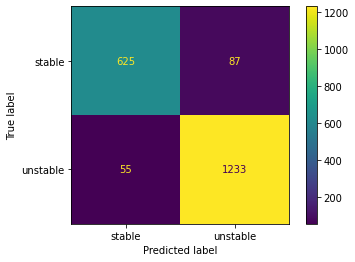

In [15]:
#confusion matrix
plot_confusion_matrix(RandomFor_model, standard_test_df, y_test, values_format = 'd')

In [16]:
#classification report for RandomForestClassifier
print(classification_report(y_test, Random_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



**Extra Trees Classifier**

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTrees_model = ExtraTreesClassifier(random_state = 1)
ExtraTrees_model.fit(standard_train_df, y_train)

#predictions
ExtraTrees_pred = ExtraTrees_model.predict(standard_test_df)

In [18]:
#checking performance of ExtraTreesClassifier

print('Accuracy :', round(accuracy_score(y_test, ExtraTrees_pred), 4))
print('Precision for stable', round(precision_score(y_test, ExtraTrees_pred, pos_label = 'stable'), 3))
print('Precision for unstable', round(precision_score(y_test, ExtraTrees_pred, pos_label = 'unstable'), 3))
print('Recall for stable', round(recall_score(y_test, ExtraTrees_pred, pos_label = 'stable'), 3))
print('Recall for unstable', round(recall_score(y_test, ExtraTrees_pred, pos_label = 'unstable'), 3))
print('F1 score for stable', round(f1_score(y_test, ExtraTrees_pred, pos_label = 'stable'), 3))
print('F1 score for unstable', round(f1_score(y_test, ExtraTrees_pred, pos_label = 'unstable')))

Accuracy : 0.928
Precision for stable 0.941
Precision for unstable 0.922
Recall for stable 0.851
Recall for unstable 0.97
F1 score for stable 0.894
F1 score for unstable 1.0


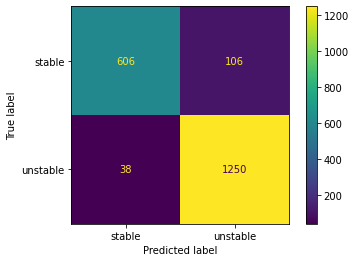

In [19]:
#confusion matrix
plot_confusion_matrix(ExtraTrees_model, standard_test_df, y_test, values_format = 'd')

In [20]:
#classification report for ExtraTreesClassifier
print(classification_report(y_test, ExtraTrees_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



**XGboost**

In [21]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(random_state = 1)
XGB_model.fit(standard_train_df, y_train)

#predictions
XGB_pred = XGB_model.predict(standard_test_df)

In [22]:
#checking performance of XGBClassifier

print('Accuracy :', round(accuracy_score(y_test, XGB_pred), 4))
print('Precision for stable', round(precision_score(y_test, XGB_pred, pos_label = 'stable'), 3))
print('Precision for unstable', round(precision_score(y_test, XGB_pred, pos_label = 'unstable'), 3))
print('Recall for stable', round(recall_score(y_test, XGB_pred, pos_label = 'stable'), 3))
print('Recall for unstable', round(recall_score(y_test, XGB_pred, pos_label = 'unstable'), 3))
print('F1 score for stable', round(f1_score(y_test, XGB_pred, pos_label = 'stable'), 3))
print('F1 score for unstable', round(f1_score(y_test, XGB_pred, pos_label = 'unstable')))

Accuracy : 0.9195
Precision for stable 0.921
Precision for unstable 0.919
Recall for stable 0.847
Recall for unstable 0.96
F1 score for stable 0.882
F1 score for unstable 1.0


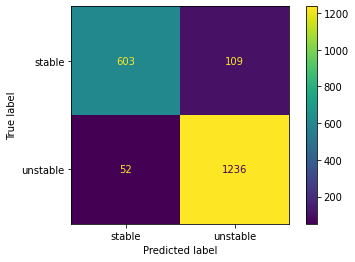

In [23]:
#confusion matrix
plot_confusion_matrix(XGB_model, standard_test_df, y_test, values_format = 'd')

In [24]:
#classification report for XGBClassifier
print(classification_report(y_test, XGB_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



**LightGBM**

In [25]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier(random_state = 1)
LGBM_model.fit(standard_train_df, y_train)

#predictions
LGBM_pred = LGBM_model.predict(standard_test_df)

In [26]:
#checking performance of LGBMlassifier

print('Accuracy :', round(accuracy_score(y_test, LGBM_pred), 4))
print('Precision for stable', round(precision_score(y_test, LGBM_pred, pos_label = 'stable'), 3))
print('Precision for unstable', round(precision_score(y_test, LGBM_pred, pos_label = 'unstable'), 3))
print('Recall for stable', round(recall_score(y_test, LGBM_pred, pos_label = 'stable'), 3))
print('Recall for unstable', round(recall_score(y_test, LGBM_pred, pos_label = 'unstable'), 3))
print('F1 score for stable', round(f1_score(y_test, LGBM_pred, pos_label = 'stable'), 3))
print('F1 score for unstable', round(f1_score(y_test, LGBM_pred, pos_label = 'unstable')))

Accuracy : 0.9375
Precision for stable 0.93
Precision for unstable 0.942
Recall for stable 0.892
Recall for unstable 0.963
F1 score for stable 0.91
F1 score for unstable 1.0


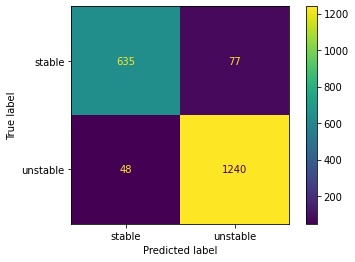

In [27]:
#confusion matrix
plot_confusion_matrix(LGBM_model, standard_test_df, y_test, values_format = 'd')

In [28]:
#classification report for LGBMClassifier
print(classification_report(y_test, LGBM_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



**Using RandomizedSearchCV for Improving the Extra Trees Classifier**

In [29]:
#given parameters
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_features': max_features}

from sklearn.model_selection import RandomizedSearchCV
ExtraTreesImproved_model = RandomizedSearchCV(ExtraTrees_model, hyperparameter_grid, random_state = 1, cv = 5,
                                              n_iter = 10, n_jobs = -1, verbose = 1,
                                              scoring = 'accuracy')
ExtraTreesImproved_model.fit(standard_train_df, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [30]:
#best parameters found
ExtraTreesImproved_model.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [31]:
ExtraTreesImproved_pred = ExtraTreesImproved_model.predict(standard_test_df)
#classification report for ExtraTreeslassifier with RandomizedSearchCV
print(classification_report(y_test, ExtraTreesImproved_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [32]:
#feature importance
ExtraTreesOptimal_model = ExtraTreesClassifier(max_features = None, 
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000, 
                            random_state = 1)
ExtraTreesOptimal_model.fit(standard_train_df, y_train)

ExtraTreesOptimal_model.predict(standard_test_df)


array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [35]:
importance =  ExtraTreesOptimal_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in ExtraTreesOptimal_model.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]

print("Feature ranking:")

for f in range(standard_train_df.shape[1]):
    print((standard_train_df.columns[indices[f]], importance[indices[f]]))  

 

Feature ranking:
('tau2', 0.14050750384993677)
('tau1', 0.13723974766109256)
('tau4', 0.1354167630909727)
('tau3', 0.13468028520386593)
('g3', 0.11306267999167334)
('g4', 0.10954089174337298)
('g2', 0.10757764577478764)
('g1', 0.10256244080927947)
('p3', 0.005429268421191957)
('p2', 0.005336864710946151)
('p4', 0.004962486591192238)
('p1', 0.003683422151688322)
